#Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.


In [ ]:
def separador():
    print("\n" + "=" * 170 + "\n")
def header(Titulo):
  por=((170-len(Titulo))//10)
  a=int(1.2*por)
  print("."*a+"·"*a+"~"*a+"≈"*a+"≋"
  *int(por*.2),Titulo,"≋"*int(por*.2)
  +"≈"*a+"~"*a+"·"*a+"."*a,"\n\n")

..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Ejercicio #1 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 


Prueba de normalidad Shapiro-Wilk de la columna "ash"
p-valor = 0.03868


Normalización Min-Max de la columna "ash"
p-valor = 0.03868


Graficación de los datos originales y normalizados


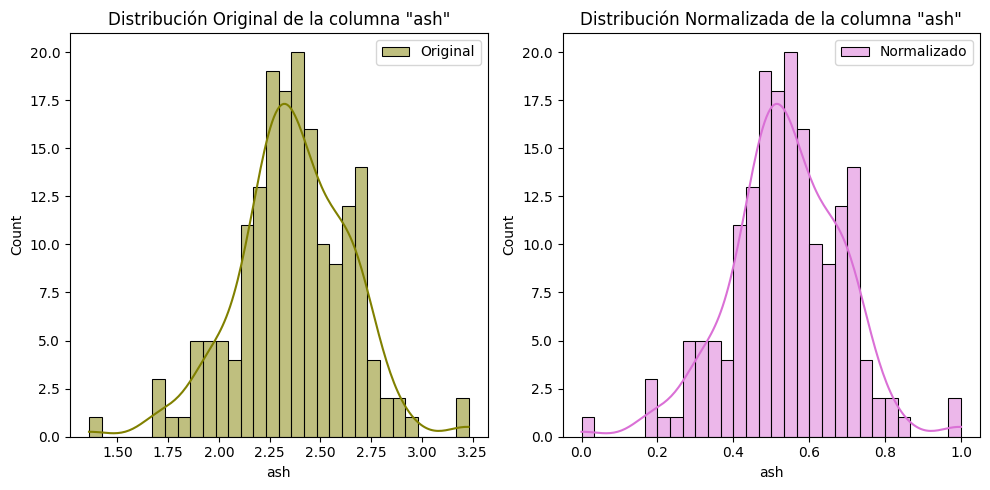

In [ ]:
header('Ejercicio #1')
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
wine=load_wine()
#print(f'Descripcion del dataset Wine con sklearn:\n{wine.DESCR}')
dfwine=pd.DataFrame(data=wine.data, columns=wine.feature_names)
#print(f'Cabecera del dataset\n{dfwine.head(5).to_string()}')
#print(f'Descripcion con pandas:\n{dfwine.describe().to_string()}')
#separador()
print('Prueba de normalidad Shapiro-Wilk de la columna "ash"')
data=dfwine['ash']
shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
print(f"p-valor = {shapiro_test.pvalue:.5f}")
separador()
print('Normalización Min-Max de la columna "ash"')
data_min_max = (data - data.min()) / (data.max() - data.min())
shapiro_test2 = stats.shapiro(data_min_max)
print(f"p-valor = {shapiro_test2.pvalue:.5f}")
separador()
print('Graficación de los datos originales y normalizados')
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data, ax=axs[0], kde=True, bins=30, color='olive', label='Original')
sns.histplot(data_min_max, ax=axs[1], kde=True,
             bins=30, color='orchid', label='Normalizado')
axs[0].set_title('Distribución Original de la columna "ash"')
axs[1].set_title('Distribución Normalizada de la columna "ash"')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()
separador()


**Preguntas:**

**1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?**

**Rango de valores:**
Se reduce la escala del conjunto original, quedando el rango de todos los datos entre 0 y 1.

**Dispersión:**
La mediana, media y la mediana se reubican por que cambió la escala, pero es proporcional al cambio. De igual forma la desviación estandar y varianza.

**Outliers:**
Todo sigue igual, solo se reescalan. No se modifican.

**Sesgo:**
El sesgo de la distribución no cambia, es decir conserva su forma original.

**Curtosis:**
La curtosis tampoco cambia.

**Forma de la curva:**
La forma de la curva tampoco cambia.


**2. ¿Qué interpretas del p-valor antes y después de la normalización?**

El p-valor permanece igual antes y despues de la transformación. Un P=0.03868 significa que hay relevancia en los datos, o sea son estadisticamente signifiativos. Se rechaza la hipotesis nula.

================================================================================================================

# Ejercicio 2: Normalización Z-Score

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.




..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Ejercicio #2 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 


Prueba de normalidad de la columna "flavanoids"
p-valor = 0.00002


Z-Score de la columna "flavanoids"


p-valor después de la normalizacón Z-score = 0.00002


Graficación de los datos originales y normalizados
La desviacion estandar de la columna "flavanoids" es: 0.99886
El z-score de la columna "flavanoids" es: -0.00000


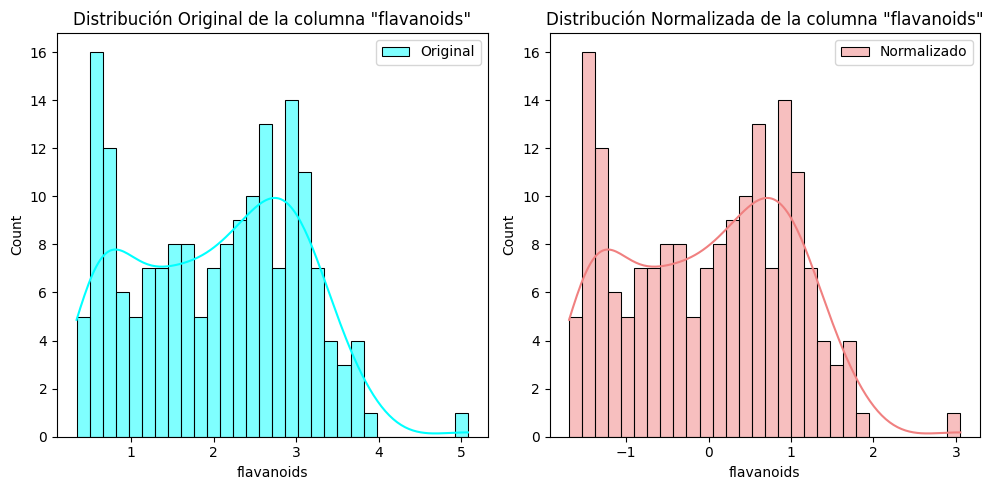

In [ ]:
header('Ejercicio #2')
#print(dfwine.info())
print('Prueba de normalidad de la columna "flavanoids"')
data=dfwine['flavanoids']
shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
print(f"p-valor = {shapiro_test.pvalue:.5f}")
separador()
print('Z-Score de la columna "flavanoids"')
data_zscore = (data - data.mean()) / data.std()
shapiro_test2 = stats.shapiro(data_zscore)
separador()
print(f"p-valor después de la normalizacón Z-score = {shapiro_test2.pvalue:.5f}")
separador()
print('Graficación de los datos originales y normalizados')
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data, ax=axs[0], kde=True, bins=
             30, color='cyan', label='Original')
sns.histplot(data_zscore, ax=axs[1], kde=True,
             bins=30, color='lightcoral', label='Normalizado')
axs[0].set_title('Distribución Original de la columna "flavanoids"')
axs[1].set_title('Distribución Normalizada de la columna "flavanoids"')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
print(f'La desviacion estandar de la columna "flavanoids" es: {data.std():.5f}')
print(f'El z-score de la columna "flavanoids" es: {data_zscore.mean():.5f}')


**Preguntas:**

**1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?**

**Rango de valores:**
Se trasladan para estar alrededor del 0. El rango tiene la misma extensión. Solo en otro lado.

**Dispersión:**
La media y desviacion estandar, no cambian. Solo la nueva media es 0 y la nueva desviación estandar es 1.

**Outliers:**
No cambian los outliers, solo que ahora se miden en cuantas desviaciones estandar tienen de la nueva media.

**Sesgo:**
No hay cambios.

**Curtosis:**
No hay cambios.

**Forma de la curva:**
No hay cambios.


**2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?**
La normalización Z-score no mueve la distribución ni soluciona problemas de anormalidad, pero ayuda al rendimiento e interpretacion de muchos algoritmos de analisis de datos y machine learning, porque al escalar las variables de forma uniforme ayuda a compararlas con efectividad y eficacia, sin alterar outliers ni la curtosis.

================================================================================================================

# Ejercicio 3: Transformación Logarítmica
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.



..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Ejercicio #3 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 


Prueba de normalidad Shapiro-Wilk de los datos originales y transformados
p-valor de los datos originales = 0.00000
p-valor de los datos transformados = 1.00000


Grafica de los datos originales y transformados usando matplotlib


<ipython-input-4-9ea67dd1db3f>:7: RuntimeWarning: divide by zero encountered in log
  numale_log=np.log(numale)


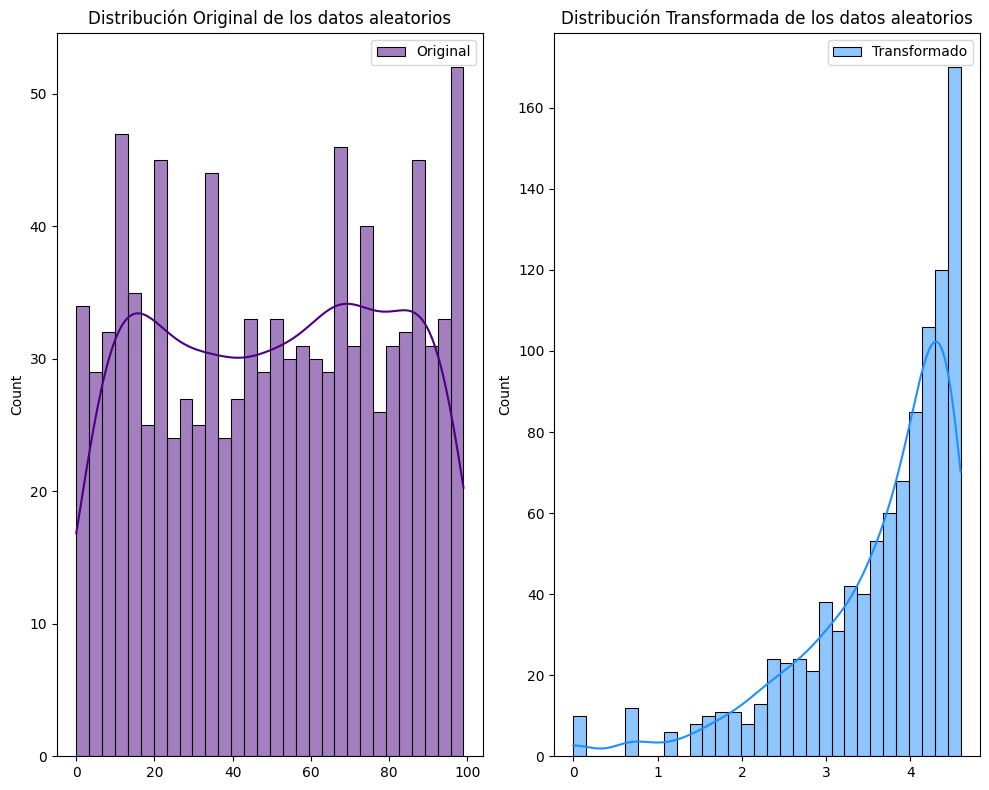

In [ ]:
header('Ejercicio #3')
np.random.seed(8)
#carga de conjunto de datos aleatorios generados con numpy.
numale=abs(np.random.randint(0,100,1000))
#print(numale)
#Transformación logaritmica de numale
numale_log=np.log(numale)
#print(numale_log)
print('Prueba de normalidad Shapiro-Wilk de los datos originales y transformados')
shapiro_test = stats.shapiro(numale)
shapiro_test2 = stats.shapiro(numale_log)
print(f"p-valor de los datos originales = {shapiro_test.pvalue:.5f}")
print(f"p-valor de los datos transformados = {shapiro_test2.pvalue:.5f}")
separador()
print('Grafica de los datos originales y transformados usando matplotlib')
fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.histplot(numale, ax=axs[0], kde=True, bins=30, color='indigo', label='Original')
sns.histplot(numale_log, ax=axs[1], kde=True, bins=30, color='dodgerblue', label='Transformado')
axs[0].set_title('Distribución Original de los datos aleatorios')
axs[1].set_title('Distribución Transformada de los datos aleatorios')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

**Preguntas:**

**1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?**

**Rango de valores:**
Originalmente el conjunto presenta un rango de valores del 0 al 100, con la tranformación pasa al rango 0 al casi 5, esto es por la compresion significativa de valores de esta transformación, en donde los valores altos se comprimen y los bajos se expanden.

**Dispersión:**
No se trasladan los datos a una nueva media como el z-score, pero si cambia la distribución. Disminuye la varianza y desviacion estandar, porque al cambiar los datos (acercandolos en magnitud) la dispersión se reduce.

**Outliers:**
En esta transformación si se tratan outliers,ya que los valores muy altos se reducen drasticamente y los bajos se expanden, es decir reduce los outliers acercando mas los valores.

**Sesgo:**
Reduce el sesgo positivo comprimiendo los valores altos, acercando la distribución a una forma mas parecida a la normal.

**Curtosis:**
Se reduce la curtosis, ya que se acerca mas a la normalidad.

**Forma de la curva:**
En el conjunto original los valores presentan una forma caotica y asimetrica, luego des la transformación se comporta mas normalmente y aumenta la simetria, pareciendose a una curva en forma de campana.



**2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?**

El cambio de 0 a  1 en el p-valor, es debido a que los datos eran muy asimetricos antes de tratarlos, pero luego de la normalización logaritmica en donde se transforman los valores altos y bajos, pasa a estar muy cerca de la normalidad segun el test Shapiro-Wilk.

================================================================================================================

# Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.



..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Ejercicio 4 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 


Se tiene un conjunto de datos, conformado por 1000 valores al azar
Se aplica la la transformación por raiz cuadrada a los datos


Comparación de normalidad shapiro-wilk de los datos originales y transformados
p-valor de los datos originales = 0.00000
p-valor de los datos transformados = 0.00000


Grafica de los datos originales y transformados usando matplotlib


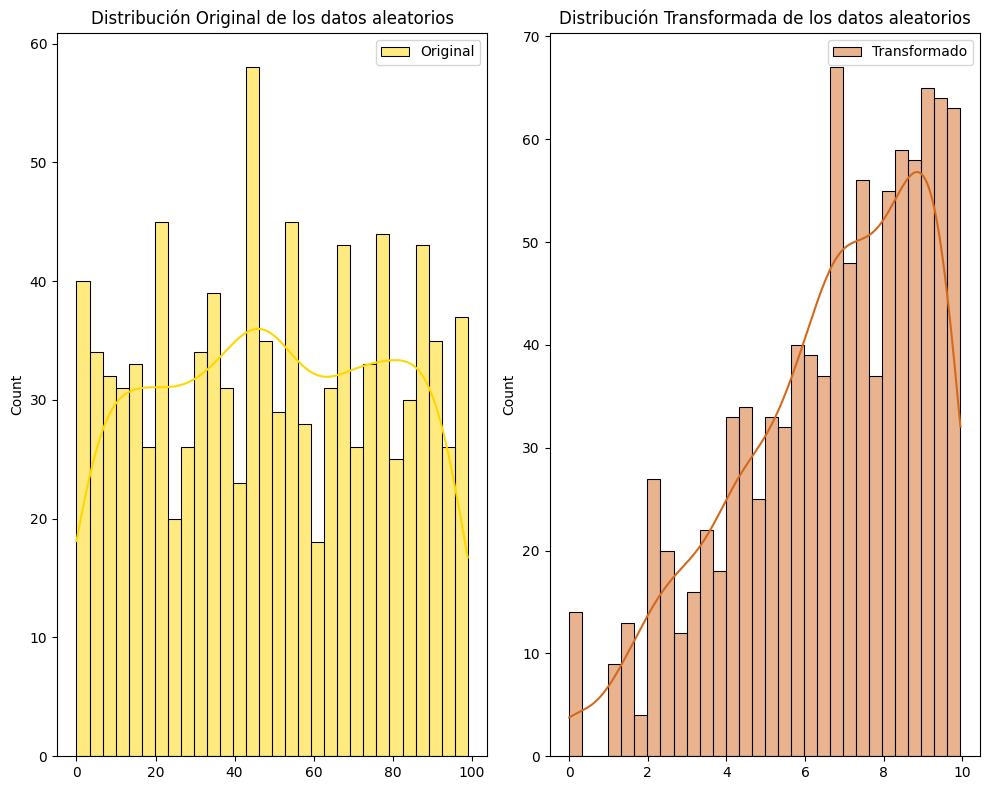

In [ ]:
header('Ejercicio 4')
np.random.seed(7)
numale=abs(np.random.randint(0,100,1000))
print(f'Se tiene un conjunto de datos, conformado por {len(numale)} valores al azar')
#print(numale)
print('Se aplica la la transformación por raiz cuadrada a los datos')
numale_raiz=np.sqrt(numale)
separador()
print(f'Comparación de normalidad shapiro-wilk de los datos originales y transformados')
shapiro_test = stats.shapiro(numale)
shapiro_test2 = stats.shapiro(numale_raiz)
print(f"p-valor de los datos originales = {shapiro_test.pvalue:.5f}")
print(f"p-valor de los datos transformados = {shapiro_test2.pvalue:.5f}")
separador()
print('Grafica de los datos originales y transformados usando matplotlib')
fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.histplot(numale, ax=axs[0], kde=True, bins=30, color='gold', label='Original')
sns.histplot(numale_raiz, ax=axs[1], kde=True, bins=30, color='chocolate', label='Transformado')
axs[0].set_title('Distribución Original de los datos aleatorios')
axs[1].set_title('Distribución Transformada de los datos aleatorios')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

**Preguntas:**

**1 y 2.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos y que pasa con los valores extremos?**

**Rango de valores:**
El conjunto original era de 0 a 100, luego de aplicar la tranformación por raiz cuadrada pasó a ser de 0 a 10. Es decir, redujo drasticamente el rango superior, comprimiendo los valores mas altos.

**Dispersión:**
La media y la mediana se desplazan, pero se mantiene la relación.
Los valores altos se comprimen, por tanto disminuye la varianza.

**Outliers:**
Los valores mas altos se redujeron en mayor medida, por que se aplica la raiz cuadrada, al contrario, los valores bajos solo se reducen poco, ya que su raiz no es grande.

**Sesgo:**
La distribución se acerca un poco a la normalidad.

**Curtosis:**
La cola perdió parte de su peso, reduciendo la curtosis.

**Forma de la curva:**
Visualmente se asemeja mas a la distribución de campana, la transformación no fue tan fuerte como al aplicar la logarítmica.



================================================================================================================

# Ejercicio 5: Transformación Box-Cox
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.



..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ Ejercicio #5 ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 


Se genera un conjunto de datos aleatorios con 1000 valores
Se aplica la transformación Box-Cox a los datos
Se realiza una prueba de normalidad Shapiro-Wilk de los datos originales y transformados
p-valor de los datos originales = 0.00000
p-valor de los datos transformados = 0.00000


Grafica de los datos originales y transformados usando matplotlib


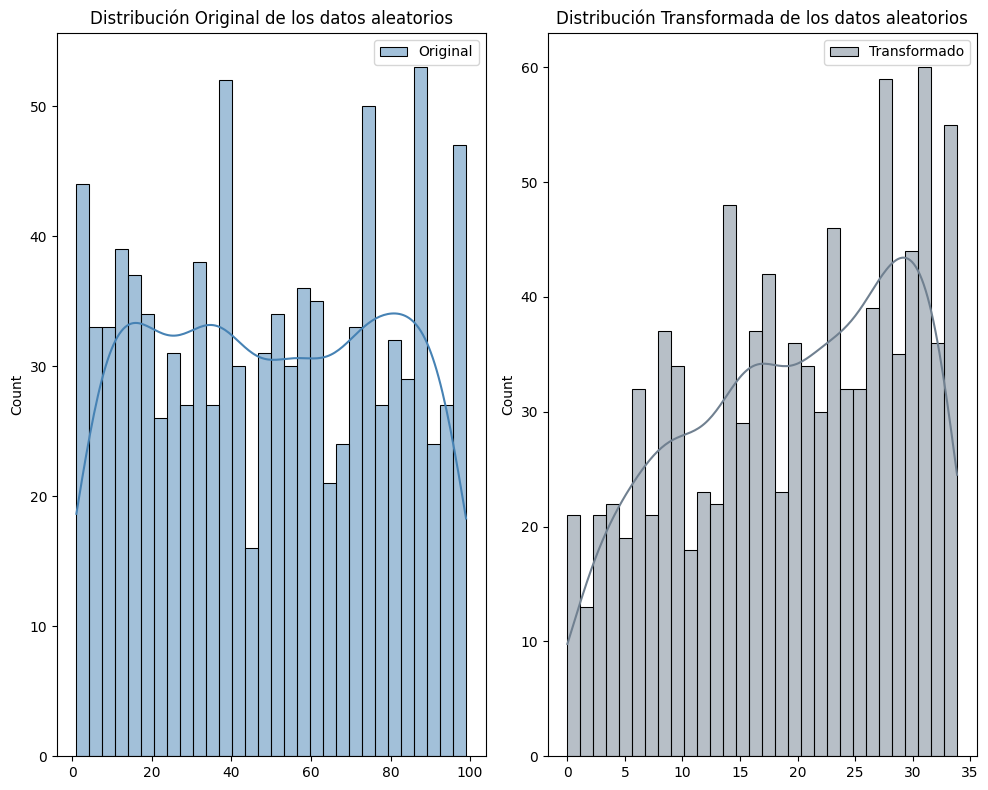

El lambda que utilizó la redistribución boxcox es: 0.69703


In [ ]:
header('Ejercicio #5')
np.random.seed(10)
randnum=np.random.randint(1,100,1000)
print(f'Se genera un conjunto de datos aleatorios con {len(randnum)} valores')
print(f'Se aplica la transformación Box-Cox a los datos')
boxcox, boxbox_lambda=stats.boxcox(randnum)
print(f'Se realiza una prueba de normalidad Shapiro-Wilk de los datos originales y transformados')
shapiro_test = stats.shapiro(randnum)
shapiro_test2 = stats.shapiro(boxcox)
print(f"p-valor de los datos originales = {shapiro_test.pvalue:.5f}")
print(f"p-valor de los datos transformados = {shapiro_test2.pvalue:.5f}")
separador()
print('Grafica de los datos originales y transformados usando matplotlib')
fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.histplot(randnum, ax=axs[0], kde=True, bins=30, color='steelblue', label='Original')
sns.histplot(boxcox, ax=axs[1], kde=True, bins=30, color='slategray', label='Transformado')
axs[0].set_title('Distribución Original de los datos aleatorios')
axs[1].set_title('Distribución Transformada de los datos aleatorios')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()
print(f'El lambda que utilizó la redistribución boxcox es: {boxbox_lambda:.5f}')

**Preguntas:**

**1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?**

**Rango de valores:**
El conjunto original era de 0 a 100, luego de aplicar la tranformación por box-cox pasó a ser de 0 a casi 35. Es decir, redujo drasticamente el rango superior, comprimiendo los valores mas altos.

**Dispersión:**
Desplaza la media y mediana, ya que se reajustan los valores. Se reducen los outliers y la dispersion disminuye.

**Outliers:**
Los valores altos se comprimen, acercando el conjunto. Los transforma radicalmente.

**Sesgo:**
Reduce el sesgo positivo, y se distribuye mas simetricamente, acercandolo a la normalidad.

**Curtosis:**
Reduce la curtosis al comprimir los outliers superiores, es decir, la cola es menos pronunciada, acercandose a la normalidad.


**2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?**
El lambda fue de .69703, lo que sitúa ese valor entre la transformación por raíz cuadrada (𝜆=0.5) y no transformación (𝜆=1). Aplicó un cambio similar a la primera, sin ser tan drástico como un np.sqrt.

